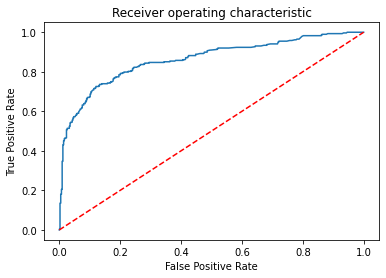

Coefficients: 
 [7.62645066] [[-1.08099579 -2.48489482 -0.04232364 -0.33432514 -0.03708441  0.12367239
  -0.20175293]]
Coefficient of precision: 0.7910
Coefficient of recall: 0.7361

 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


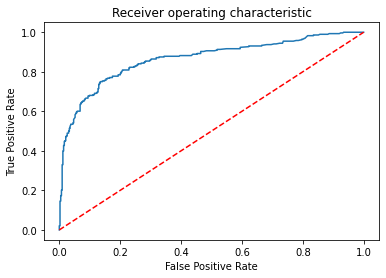

Coefficients: 
 [6.57421993] [[-1.01383027 -2.19624466 -0.03653524 -0.38132683 -0.0513771   0.13707966
  -0.20054561  0.31303611]]
Coefficient of precision: 0.7904
Coefficient of recall: 0.7465


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

train = pd.read_csv('train.csv', index_col = 0).dropna(subset=['Age','Embarked'])
train['Cabin'] = train['Cabin'].fillna('N').str.get(0).replace(['N','A','B','C','D','E','F','G','T'], [0,1,2,3,4,5,6,7,8])
train['Embarked'] = train['Embarked'].replace(['C','Q','S'], [0,1,2])

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked']].replace(['female', 'male'], [1, 2]).values.reshape(-1, 7)
Y = train['Survived'].values.reshape(-1, 1).ravel() #.replace([0, 1], [1, 0])


logreg = LogisticRegression().fit(X, Y)

fpr, tpr, thresholds = metrics.roc_curve(Y, logreg.predict_proba(X)[:, 1])
plt.plot(fpr, tpr);plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

Y_p = logreg.predict(X)
print('Coefficients: \n', logreg.intercept_, logreg.coef_)
print('Coefficient of precision: %.4f' % metrics.precision_score(Y, Y_p))
print('Coefficient of recall: %.4f' % metrics.recall_score(Y, Y_p))


import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""


train['Title'] = train['Name'].apply(get_title)
print('\n', train['Title'].unique())
train['Title'] = train['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
train['Title'] = train['Title'].replace(['Mlle','Ms','Mme'], ['Miss','Miss','Mrs'])
train['Title'] = train['Title'].replace(['Mr','Mrs','Miss','Master','Rare'], [0,1,2,3,4])

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Title']].replace(['female', 'male'], [1, 2]).values.reshape(-1, 8)
Y = train['Survived'].values.reshape(-1, 1).ravel() #.replace([0, 1], [1, 0])

logreg = LogisticRegression(max_iter=2000).fit(X, Y)

fpr, tpr, thresholds = metrics.roc_curve(Y, logreg.predict_proba(X)[:, 1])
plt.plot(fpr, tpr);plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

Y_p = logreg.predict(X)
print('Coefficients: \n', logreg.intercept_, logreg.coef_)
print('Coefficient of precision: %.4f' % metrics.precision_score(Y, Y_p))
print('Coefficient of recall: %.4f' % metrics.recall_score(Y, Y_p))


In [ ]:
from google.colab import files
files.upload()
!ls

Saving train.csv to train.csv
sample_data  train.csv
